# Importing dependencies

In [1]:
!pip install sounddevice
!pip install librosa
!pip install IPython
!pip install itertools

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
ERROR: Could not find a version that satisfies the requirement fractions (from versions: none)
ERROR: No matching distribution found for fractions


In [8]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import seaborn as sns
import pandas as pd


import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

In [45]:
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## Taking input

[-6571 -4382 -4390 ...   727   727     0]


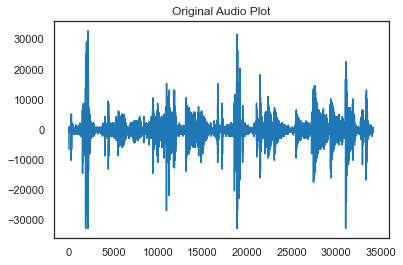

In [72]:
fs, data = wavfile.read('sound2.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

## Playing that sound

In [47]:
#sd.play(data, fs)
ipd.Audio('sound2.wav')

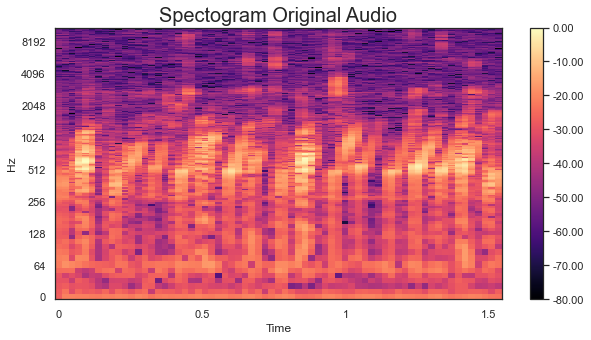

In [49]:
y, sr = librosa.load('sound2.wav')
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Original Audio', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Generating public and private keys for RSA algorithm

Select two prime no's. Suppose P = 53 and Q = 59.

Now First part of the Public key  : n = P*Q = 3127.

We also need a small exponent say e : 
But e Must be 

    1) An integer.

    2) Not be a factor of n.
 
    3) 1 < e < Φ(n) [Φ(n) is discussed below], 
    Let us now consider it to be equal to 3.
    
Our Public Key is made of n and e

1) We need to calculate Φ(n):
    
    Such that Φ(n) = (P-1)(Q-1)     
      so,  Φ(n) = 3016

    
2) Now calculate Private Key, d : 
    
    d = (k*Φ(n) + 1) / e for some integer k
    For k = 2, value of d is 2011.

In [60]:
p1 = int(input("Enter a prime number: "))
p2 = int(input("Enter another prime number: "))

n = p1*p2
print("n = p1*p2 = ",n)

import math
print("A small, odd number, co-prime with n: ")
for i in range(2,101):
    if math.gcd(n,i)==1:
        e=i
        break
print(e)
k = int(input("Enter value of k:"))

Enter a prime number: 53
Enter another prime number: 59
n = p1*p2 =  3127
A small, odd number, co-prime with n: 
2
Enter value of k:2


In [61]:
phi = (p1-1)*(p2-1)
print("phi = ",phi)
d = int((k*phi+1)/e)
print("d= ",d)

phi =  3016
d=  3016


In [62]:
public_key = n,e
private_key = n,d

print("Public Key = ", public_key)
print("Private Key = ",private_key)

Public Key =  (3127, 2)
Private Key =  (3127, 3016)


## Encrpytion of audio file

Text(0.5, 1.0, 'Encrypted Audio Plot')

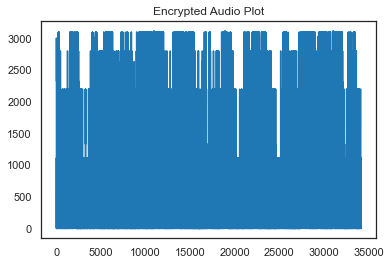

In [63]:
encrypted = (data**e)%n
plt.plot(encrypted)
plt.title("Encrypted Audio Plot")

Text(0.5, 1.0, 'Encrypted Audio Plot')

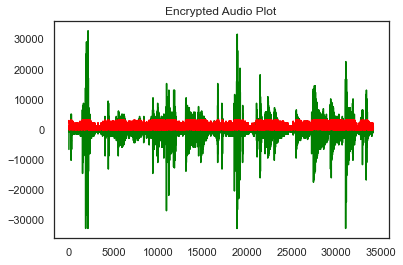

In [73]:
fs, data = wavfile.read('sound2.wav')
plt.plot(data,color='green')            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
encrypted = (data**e)%n
plt.plot(encrypted,color='red')
plt.title("Encrypted Audio Plot")

## Saving the saved file

In [64]:
encrypted = np.asarray(encrypted, dtype=np.int16)
wavfile.write('encrypted_rsa.wav', fs, encrypted)
print("A file titled 'encrypted_rsa.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_rsa.wav' is generated which is the encrypted audio to be communicated


## Loading and decrypting

In [65]:
fs, Data = wavfile.read('encrypted_rsa.wav')


## Decryption of data

Text(0.5, 1.0, 'Decrypted Audio Plot')

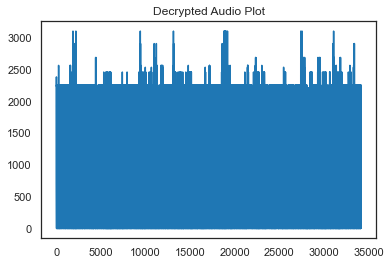

In [66]:
decrypted = (Data**d)%n
plt.plot(decrypted)
plt.title('Decrypted Audio Plot')

Text(0.5, 1.0, 'Decrypted Audio Plot')

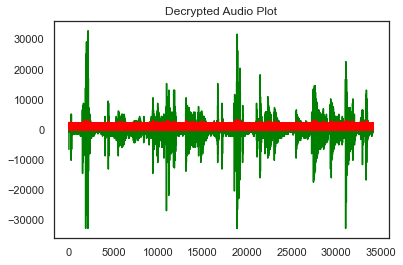

In [74]:
fs, data = wavfile.read('sound2.wav')
plt.plot(data,color='green')            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
plt.plot(decrypted,color='red')
plt.title("Decrypted Audio Plot")

In [67]:
with open('decrypted_rsa.wav', 'wb') as fd:
    fd.write(decrypted)

In [68]:
ipd.Audio('sound2.wav')
#sd.play(encrypted, fs)

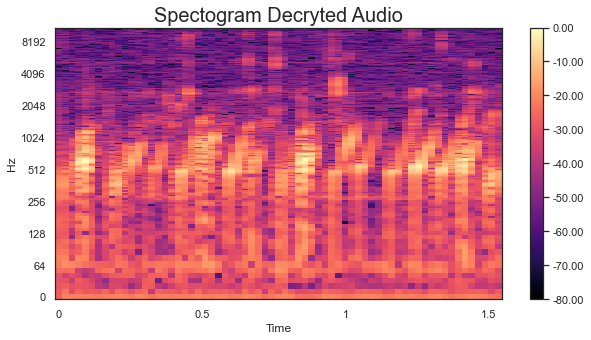

In [71]:
y1, sr1 = librosa.load('sound2.wav')
D1 = librosa.stft(y1)
S_db1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)
fig1, ax1 = plt.subplots(figsize=(10, 5))
img1 = librosa.display.specshow(S_db1,
                              x_axis='time',
                              y_axis='log',
                              ax=ax1)
ax1.set_title('Spectogram Decryted Audio', fontsize=20)
fig.colorbar(img1, ax=ax1, format=f'%0.2f')
plt.show()